In [61]:
import argparse
import snapatac2 as snap
import pandas as pd
import scanpy as sc
import numpy as np
import polars as pl

In [2]:
sc.logging.print_header()

/tmp/ipykernel_3809494/1023403583.py:1: RuntimeWarning: Failed to import dependencies for application/vnd.jupyter.widget-view+json representation. (ModuleNotFoundError: No module named 'ipywidgets')
  sc.logging.print_header()


Package,Version
snapatac2,2.8.0
pandas,2.0.3
scanpy,1.11.1
numpy,1.26.4
Component,Info
Python,"3.11.10 (main, Sep 27 2024, 06:09:18) [GCC 12.2.0]"
OS,Linux-5.15.0-131-generic-x86_64-with-glibc2.36
CPU,256 logical CPU cores
GPU,No GPU found
Updated,2025-05-15 07:25


In [109]:
data = snap.read_dataset('../../data.lustre/atac/results2/subset_adatas/_dataset.h5ads')
data

AnnDataSet object with n_obs x n_vars = 127101 x 6062095 backed at '../../data.lustre/atac/results2/subset_adatas/_dataset.h5ads'
contains 23 AnnData objects with keys: 'HCA_P_GON_CZI13941760', 'HCA_P_GON_CZI13737937', 'HCA_P_GON_CZI15033385', 'HCA_P_GON_CZI13941756', 'HCA_P_GON_CZI13941761', 'HCA_P_GON_CZI12220528', 'HCA_P_GON_CZI13654496', 'HCA_P_GON_CZI14666896', 'HCA_P_GON_CZI12220527', 'HCA_P_GON_CZI14666897', 'HCA_P_GON_CZI14609780', 'HCA_P_GON_CZI14524754', 'HCA_P_GON_CZI14609779', 'HCA_P_GON_CZI13941757', 'HCA_P_GON_CZI13187906', 'HCA_P_GON_CZI14609778', 'HCA_P_GON_CZI14666898', 'HCA_P_GON_CZI13941754', 'HCA_P_GON_CZI14524753', 'HCA_P_GON_CZI13941758', 'HCA_P_GON_CZI13941755', 'HCA_P_GON_CZI14524755', 'HCA_P_GON_CZI13941759'
    obs: 'sample', 'leiden', 'celltype', 'Donor'
    var: 'count', 'selected'
    uns: 'AnnDataSet', 'macs3', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_spectral_harmony', 'X_spectral', 'X_umap', 'X_spectral_mnn'
    obsp: 'distances'

In [110]:
samples = pd.read_csv('../metadata_scRNAseq - scATACseq_Sanger_pediatric.csv',index_col=0)
samples[:2]

,Dataset,Donor,Age,Developmental_stage,Sampling_site,Sampling_site_II,Sample_type,ion,DATE,Source ID,...,Developmental_stage.1,Tissue,Diagnosis,Sample state,Viability,10X,Comments_protocol,Sorting,Sample ID,irods
Sanger Sample ID,,,,,,,,,,,,,,,,,,,,,
HCA_P_GON_CZI12220527,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI12220528,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv2-OVR-0-SN-2a,/seq/illumina/runs/43/43719/cellranger-atac/ce...


In [111]:
data.obs['Donor'] = samples.loc[data.obs['sample'],'Donor']

/tmp/ipykernel_3809494/2960464480.py:1: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data.obs['Donor'] = samples.loc[data.obs['sample'],'Donor']


In [108]:
#data.uns['AnnDataSet'] = data.uns['AnnDataSet'].replace_column(1,data.uns['AnnDataSet']['file_path'].str.replace('../../data.lustre/atac/results2/subset_adatas/',''))
#data.uns['AnnDataSet']
#data.close()

In [112]:
snap.pp.select_features(data,n_features=250000,blacklist='../nf-atac/reference/hg38-blacklist.v2.bed')

2025-05-15 09:54:48 - INFO - Selected 248854 features.


In [50]:
data

AnnData object with n_obs x n_vars = 127101 x 6062095 backed at '../../data.lustre/atac/results2/subset_adatas/_dataset.h5ads'
    obs: 'sample', 'leiden', 'celltype', 'Donor'
    var: 'count', 'selected'
    uns: 'AnnDataSet', 'macs3', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_spectral_mnn', 'X_umap', 'X_spectral', 'X_spectral_harmony'
    obsp: 'distances'

In [113]:
data.var['selected'].value_counts()

/tmp/ipykernel_3809494/1216292815.py:1: DeprecationWarning: `Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'
  data.var['selected'].value_counts()


selected,count
bool,u32
false,5813241
true,248854


In [114]:
snap.tl.spectral(data)

In [115]:
%%time
snap.pp.mnc_correct(data, batch="Donor",use_rep='X_spectral',n_jobs=8)

CPU times: user 30min 22s, sys: 7min 28s, total: 37min 50s
Wall time: 9min


In [116]:
%%time
snap.pp.harmony(data, batch="Donor",use_rep='X_spectral', max_iter_harmony=20)

2025-05-15 10:38:00,843 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-15 10:38:00 - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-15 10:38:27,275 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-15 10:38:27 - INFO - sklearn.KMeans initialization complete.
2025-05-15 10:38:28,739 - harmonypy - INFO - Iteration 1 of 20
2025-05-15 10:38:28 - INFO - Iteration 1 of 20
2025-05-15 10:40:15,463 - harmonypy - INFO - Iteration 2 of 20
2025-05-15 10:40:15 - INFO - Iteration 2 of 20
2025-05-15 10:42:22,579 - harmonypy - INFO - Iteration 3 of 20
2025-05-15 10:42:22 - INFO - Iteration 3 of 20
2025-05-15 10:42:59,392 - harmonypy - INFO - Converged after 3 iterations
2025-05-15 10:42:59 - INFO - Converged after 3 iterations


CPU times: user 9min 39s, sys: 19min 53s, total: 29min 33s
Wall time: 5min


In [117]:
%%time
snap.tl.umap(data,key_added='sp_umap')
snap.tl.umap(data, use_rep="X_spectral_harmony",key_added='sp_har_umap')
snap.tl.umap(data, use_rep="X_spectral_mnn",key_added='sp_mnn_umap')

/env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


CPU times: user 23min 7s, sys: 7.01 s, total: 23min 14s
Wall time: 7min 26s


In [118]:
data

AnnDataSet object with n_obs x n_vars = 127101 x 6062095 backed at '../../data.lustre/atac/results2/subset_adatas/_dataset.h5ads'
contains 23 AnnData objects with keys: 'HCA_P_GON_CZI13941760', 'HCA_P_GON_CZI13737937', 'HCA_P_GON_CZI15033385', 'HCA_P_GON_CZI13941756', 'HCA_P_GON_CZI13941761', 'HCA_P_GON_CZI12220528', 'HCA_P_GON_CZI13654496', 'HCA_P_GON_CZI14666896', 'HCA_P_GON_CZI12220527', 'HCA_P_GON_CZI14666897', 'HCA_P_GON_CZI14609780', 'HCA_P_GON_CZI14524754', 'HCA_P_GON_CZI14609779', 'HCA_P_GON_CZI13941757', 'HCA_P_GON_CZI13187906', 'HCA_P_GON_CZI14609778', 'HCA_P_GON_CZI14666898', 'HCA_P_GON_CZI13941754', 'HCA_P_GON_CZI14524753', 'HCA_P_GON_CZI13941758', 'HCA_P_GON_CZI13941755', 'HCA_P_GON_CZI14524755', 'HCA_P_GON_CZI13941759'
    obs: 'sample', 'leiden', 'celltype', 'Donor'
    var: 'count', 'selected'
    uns: 'AnnDataSet', 'macs3', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_spectral_harmony', 'X_spectral', 'X_sp_mnn_umap', 'X_umap', 'X_sp_har_umap', 'X_spectral_

In [119]:
data.close()

In [120]:
data = sc.read_h5ad('../../data.lustre/atac/results2/subset_adatas/_dataset.h5ads')
data

AnnData object with n_obs × n_vars = 127101 × 6062095
    obs: 'sample', 'leiden', 'celltype', 'Donor'
    var: 'count', 'selected'
    uns: 'AnnDataSet', 'macs3', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_sp_har_umap', 'X_sp_mnn_umap', 'X_sp_umap', 'X_spectral', 'X_spectral_harmony', 'X_spectral_mnn', 'X_umap'
    obsp: 'distances'

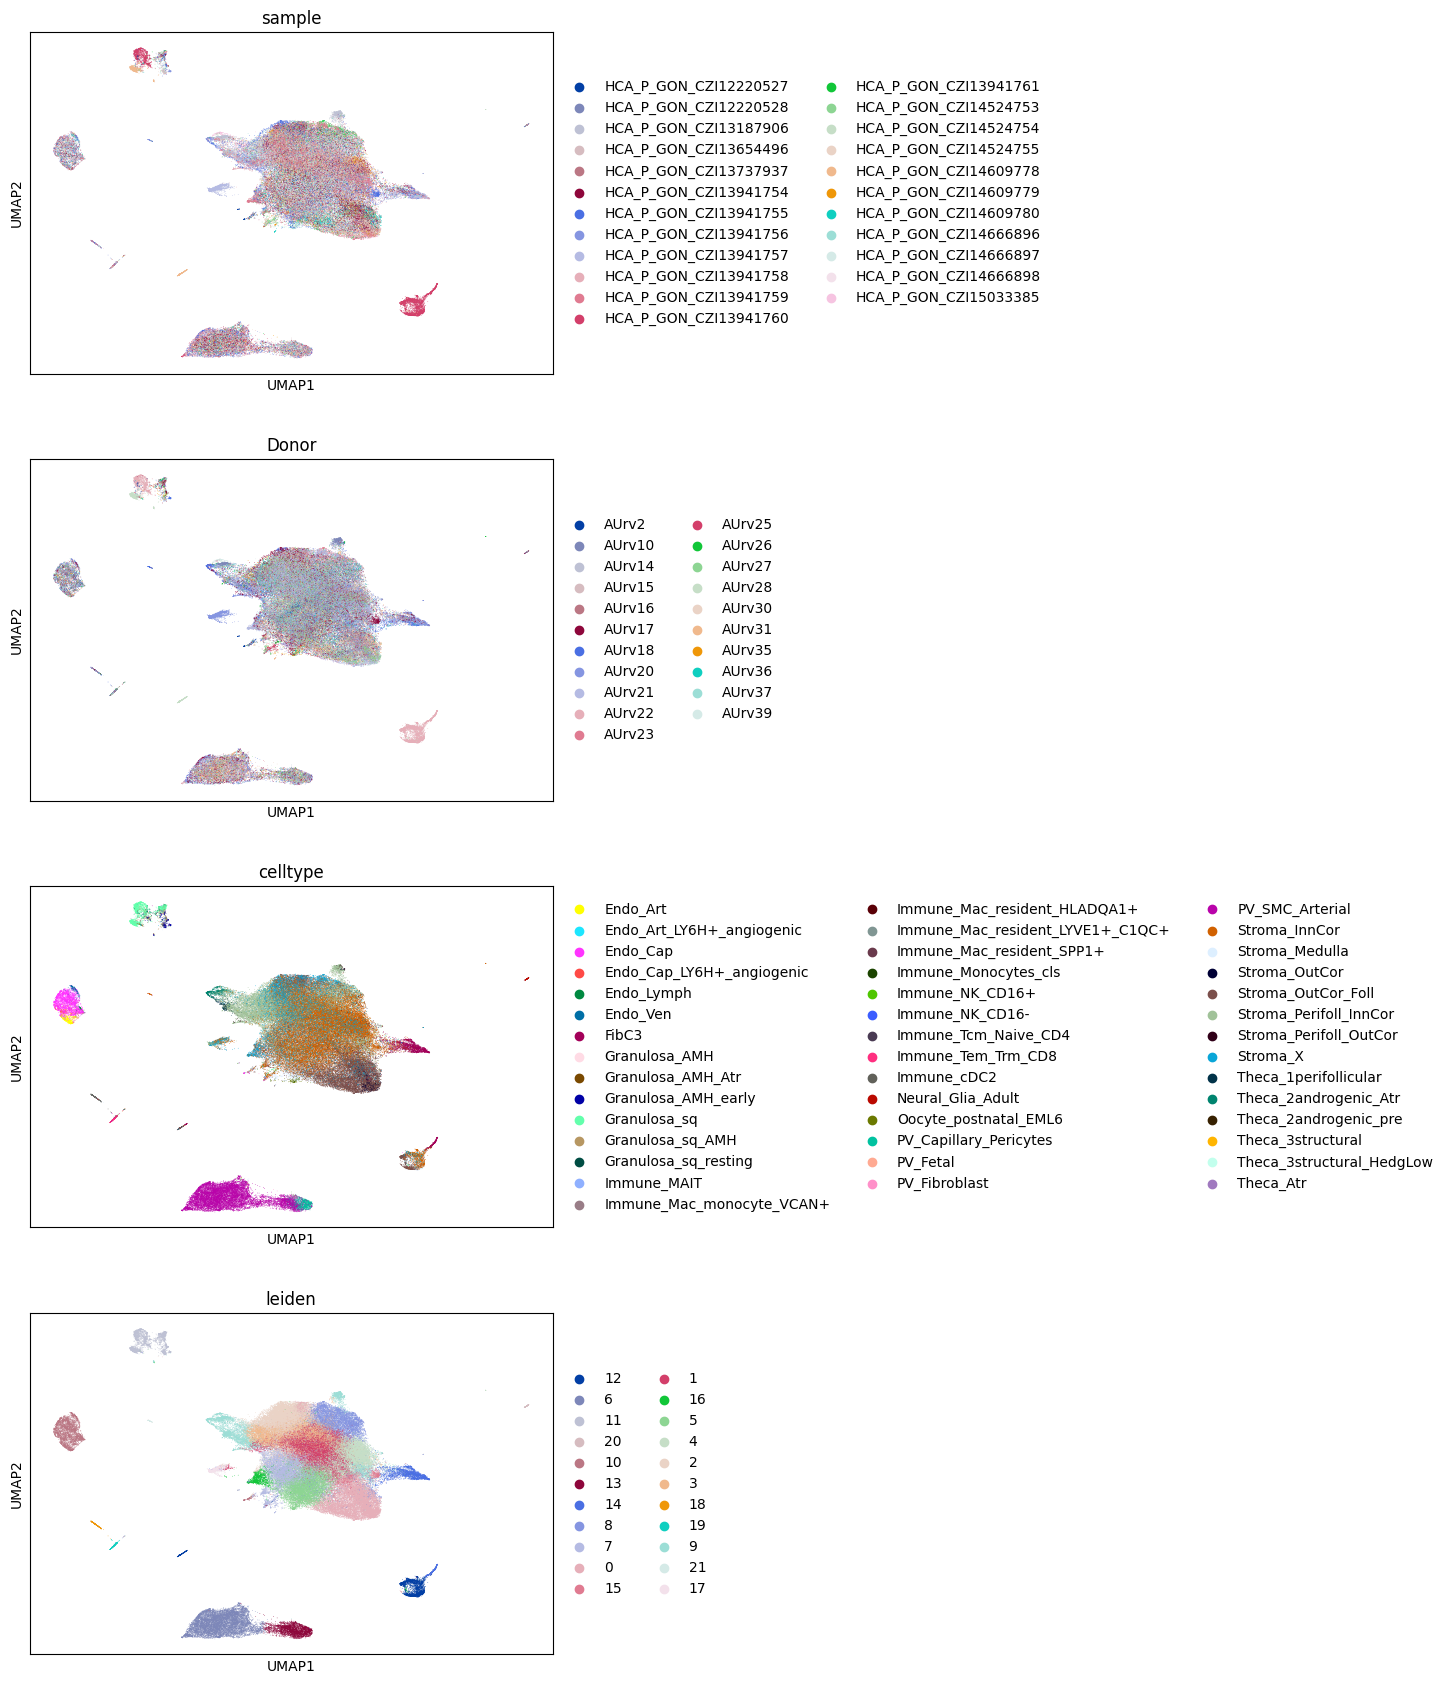

In [122]:
sc.pl.umap(data,color=['sample','Donor','celltype','leiden'],ncols=1)

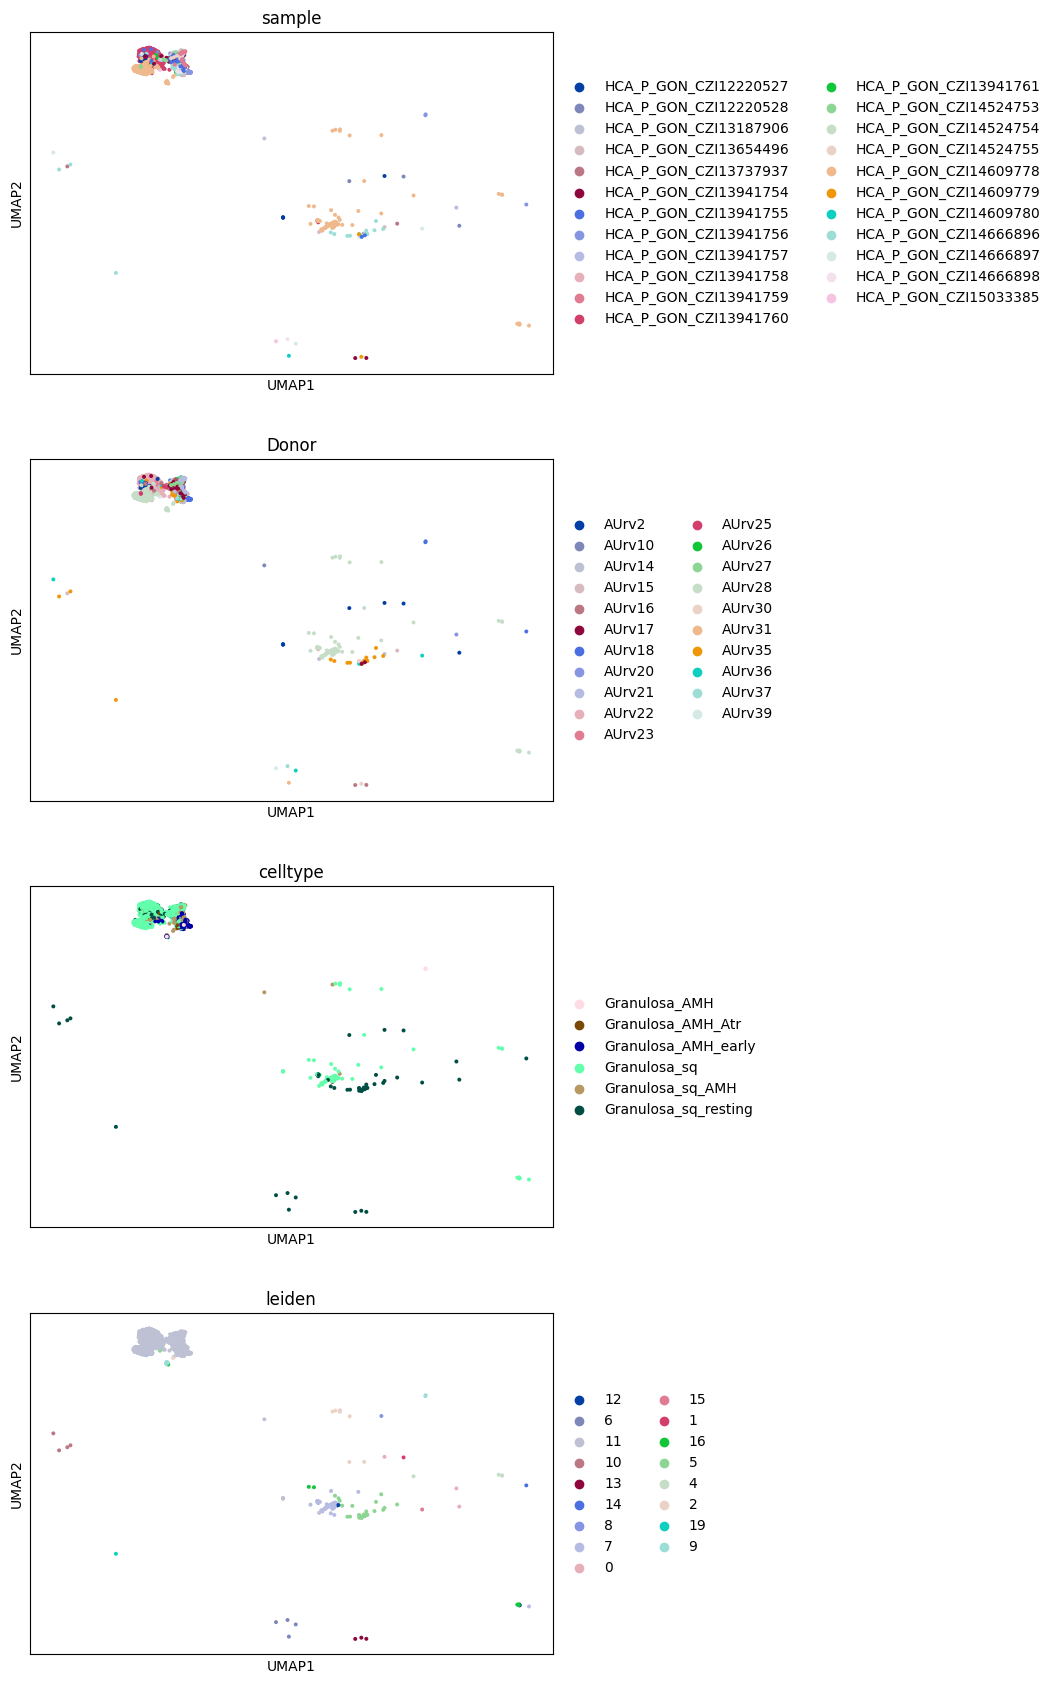

In [125]:
sc.pl.umap(data[data.obs.celltype.str.startswith('Granu'),:],color=['sample','Donor','celltype','leiden'],ncols=1)